In this code, queries have been programmatically synthesized using Phi-2 for the purpose of generating a labeled dataset suitable for training and evaluating models on intent and sentiment classification tasks.

###**Key Components**
####**Sentiments Covered**:

* Positive

* Neutral

* Negative

####**Intents Included**:

* Baggage

* Check-in and Boarding

* Booking, Modifications and Cancellations

* Travel Documents

* Fares and Payments

* Refunds

* Flight Operations

* Passenger Services

* Loyalty and Rewards

* Customer Support

* Other ( Intents other than the above)

* Irrelevant (Intents unrelated to the domain)

###**Approach**

**Prompt Templates**:
Manually crafted prompt templates were designed for each intent and sentiment combination. These templates simulate realistic customer queries for a domestic Indian airline.

**Model Used**:
Phi-2 was used to generate high-quality, diverse user queries by filling in sentiment-specific instructions within each prompt template.

**Labels**:
Each query generated has two associated ground truth labels:

Intent (one of the 12 listed categories)

Sentiment (positive, neutral, negative)

###**Purpose**
To create a realistic, balanced dataset for training or benchmarking intent and sentiment classification models.

The dataset can be used to:

* Fine-tune a classification model.

* Evaluate the performance of existing models.

* Serve as a standard for comparison in model experimentation pipelines for our project.



In [1]:
!pip install transformers accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the Phi-2 model from Hugging Face
model_name = "microsoft/phi-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")

# Move model to GPU (if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(51200, 2560)
    (layers): ModuleList(
      (0-31): 32 x PhiDecoderLayer(
        (self_attn): PhiAttention(
          (q_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (k_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (v_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (dense): Linear(in_features=2560, out_features=2560, bias=True)
        )
        (mlp): PhiMLP(
          (activation_fn): NewGELUActivation()
          (fc1): Linear(in_features=2560, out_features=10240, bias=True)
          (fc2): Linear(in_features=10240, out_features=2560, bias=True)
        )
        (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (rotary_emb): PhiRotaryEmbedding()
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (final_layernorm): LayerNorm((2560,), eps=1

In [3]:
import random
import pandas as pd

def generate_query(intent, sentiment, max_new_tokens=100):
    prompt = random.choice(prompt_templates).format(intent=intent, sentiment=sentiment)

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    output = model.generate(
        **inputs,
        do_sample=True,
        temperature=0.7,
        top_k=50,
        top_p=0.9,
        max_new_tokens=max_new_tokens
    )

    return tokenizer.decode(output[0], skip_special_tokens=True)

def get_csv(intent, queries_per_sentiment=50):
    data = []
    sentiments = ["positive", "negative", "neutral"]

    for sentiment in sentiments:
        print(f"\n🔹 Generating {queries_per_sentiment} queries for '{intent}' with sentiment: '{sentiment}'")
        for i in range(1, queries_per_sentiment + 1):
            query = generate_query(intent, sentiment)
            data.append({"text": query, "intent": intent, "sentiment": sentiment})
            print(f"Query {i} ✅")

    df = pd.DataFrame(data)
    filename = f"{intent.replace(' ', '_')}_queries.csv"
    df.to_csv(filename, index=False)
    print(f"\n✅ All queries saved to '{filename}'")

In [2]:
premise = "You are a user with a customer service query for SkyWings airline, which operates in India and offers only domestic flights."

fixed_instruction = (
    "Generate one complete, realistic customer service question. "
    "The question should reflect the way a typical customer would speak when contacting an airline, keeping in mind the cultural and conversational nuances common in India. "
    "Avoid explicitly mentioning you are from India, as it's already understood. "
    "The tone should be natural, human-like, and aligned with the specified sentiment, as if written by a real person seeking assistance."
)

In [ ]:
prompt_templates = [
    f"{premise} You're a customer reaching out to an airline. Your concern is baggage-related and your tone is {{sentiment}}. Write a natural, human-like question. {fixed_instruction}",
    f"{premise} Generate a realistic query from a passenger asking about baggage policies. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a human customer with {{sentiment}} sentiment inquiring about baggage rules or issues. Make it sound like a real question. {fixed_instruction}",
    f"{premise} Write a unique and natural airline customer query about baggage. The tone should reflect a {{sentiment}} attitude. {fixed_instruction}",
    f"{premise} You're a passenger unsure about baggage allowance. Ask a distinct, realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} As a customer, you want clarity on excess baggage. Write a natural and different-sounding question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about what kind of cabin baggage is allowed. Write a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a traveler asking about fees or rules for excess baggage. Make the question sound real and use {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Write a human-like query about carrying unusual or oversized items on a flight. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're confused about rules for dangerous goods in baggage. Write a natural query that reflects a {{sentiment}} attitude. {fixed_instruction}",
    f"{premise} You're a customer whose luggage didn't arrive. Ask a real, emotionally appropriate question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how to track your checked-in baggage. Write a natural airline customer service query with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a question about transferring baggage between connecting flights. Keep it realistic and use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Write a distinct, realistic passenger inquiry about restricted items in luggage. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're unsure about musical instruments or sports gear as baggage. Ask a human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a realistic query about how many bags a passenger is allowed to carry. Make it sound natural with {{sentiment}} sentiment. {fixed_instruction}",
    f"{premise} You're a traveler asking whether you can bring a certain item in cabin baggage. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} Simulate a customer question about lost or delayed baggage and next steps. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer preparing for a flight and have a baggage concern. Write a realistic and different query using {{sentiment}} sentiment. {fixed_instruction}",
    f"{premise} You're unsure whether your baggage will be automatically transferred. Ask a unique, human-like question with a {{sentiment}} tone. {fixed_instruction}"
]


In [ ]:
get_csv("Baggage")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Baggage' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Baggage' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Baggage' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Baggage_queries.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're a customer trying to understand the check-in process. Your tone is {{sentiment}}. Write a natural question about check-in. {fixed_instruction}",
    f"{premise} Generate a realistic query from a passenger asking about web check-in policies. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a human customer with {{sentiment}} sentiment inquiring about airport check-in procedures. Make it sound like a real question. {fixed_instruction}",
    f"{premise} You're flying with SkyWings and confused about check-in options. Write a distinct, human-like query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} As a traveler, you want clarity on when and how to check in. Ask a realistic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure whether you should use web check-in or airport check-in. Ask a natural-sounding question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if your boarding pass will be valid if you do web check-in. Write a realistic query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking about check-in deadlines for SkyWings. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer with questions about the check-in counters. Write a natural and emotionally appropriate query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're checking in for a flight and need help. Write a human-like customer service query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a unique and realistic query about which terminal SkyWings operates from. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're flying soon and don't know where to go at the airport. Ask a distinct question about terminal info in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer asking whether they can check in with just their phone. Make the question sound human and use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're confused about the boarding gate process after check-in. Write a natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Write a realistic query about how early one should arrive for airport check-in. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You’ve completed web check-in but are unsure about baggage drop. Ask a human-like question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure whether web check-in is available for your flight. Ask a unique, natural customer service query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger inquiring about documents needed at check-in. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're concerned about the check-in time window. Write a realistic, emotionally matched question in a {{sentiment}} tone. {fixed_instruction}"
]

In [ ]:
get_csv("Check-in and Boarding")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Check-in and Boarding' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Check-in and Boarding' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Check-in and Boarding' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Check-in_and_Boarding_queries.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're a customer looking to modify your booking. Your tone is {{sentiment}}. Write a natural question about booking modifications. {fixed_instruction}",
    f"{premise} Generate a realistic query from a passenger asking about booking cancellation policies. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a human customer with {{sentiment}} sentiment inquiring about booking changes or cancellations. Make it sound like a real question. {fixed_instruction}",
    f"{premise} You're unsure about the process for changing your flight. Write a unique, human-like query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} As a traveler, you need to cancel your booking. Ask a realistic, emotionally appropriate question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know how to modify your travel dates. Write a natural-sounding query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the refund policy after cancelling a booking. Write a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're confused about whether changes to a booking will incur extra charges. Ask a human-like question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You missed the deadline to change your booking and need assistance. Write a natural and distinct question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’ve realized you made a mistake in your booking and want to correct it. Ask a clear, realistic question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if your booking is eligible for a cancellation refund. Write a natural query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking whether there is a grace period for canceling a flight. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're uncertain if changes can be made after booking. Ask a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about cancellation fees for your flight. Write a unique, human-sounding query with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to check if you can change your seat after booking. Write a query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if you can transfer your booking to another person. Ask a natural-sounding question with {{sentiment}} sentiment. {fixed_instruction}",
    f"{premise} You're unsure about how to upgrade your seat after booking. Ask a realistic question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re looking to cancel your booking but unsure how to proceed. Write a natural query using {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about how to cancel or modify your booking for a refund. Write a clear, human-like question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer wondering if it's possible to cancel and rebook the same flight. Ask a realistic, emotionally matched question in {{sentiment}} tone. {fixed_instruction}"
]

In [ ]:
get_csv("Booking, Modifications and Cancellations")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Booking, Modifications and Cancellations' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Booking, Modifications and Cancellations' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Booking, Modifications and Cancellations' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Booking,_Modifications_and_Cancellations_queries.csv'


In [ ]:
prompt_templates = [
    f"{premise} You're a customer asking about the documents required for domestic flights. Your tone is {{sentiment}}. Write a natural question about travel documents for domestic flights. {fixed_instruction}",
    f"{premise} You're a traveler unsure if your name on the booking needs to match the details on your identity card. Write a realistic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer with {{sentiment}} sentiment asking if they need to carry their credit/debit card original or a copy for travel. Make the question sound realistic. {fixed_instruction}",
    f"{premise} You're asking which documents are accepted for foreign nationals traveling on domestic flights. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re wondering whether your school ID will work as a photo ID for children traveling. Write a natural, human-like question with {{sentiment}} sentiment. {fixed_instruction}",
    f"{premise} You're uncertain if a nationalized bank passbook will be accepted as valid ID for travel. Write a realistic, emotion-appropriate query using {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You need clarification on whether a pension card can be used for identification during check-in. Write a human-like question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if a driving license is an acceptable document for domestic flights. Simulate a realistic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a foreign national and wondering what identification documents you can use for domestic travel. Ask a clear, natural question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're confused about whether a birth certificate is needed for an infant traveling. Write a natural-sounding question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer asking if the Aadhar card will be accepted as a valid ID for check-in. Write a realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You need to know if a photo identity card issued by your employer is acceptable for travel. Write a realistic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if a PAN card can be used as identification for domestic travel. Write a clear and natural question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know if a handicapped medical certificate can be used as a valid photo ID. Ask a human-like question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if election photo identification cards are accepted as travel documents. Write a natural, realistic query with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure if a passport is needed for foreign nationals traveling on domestic flights. Ask a realistic question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re a foreign national and want to confirm whether your passport is the only valid ID for travel on domestic flights. Write a natural-sounding query with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the required travel documents for children. Write a human-like question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re wondering if a disability photo ID card will be accepted for check-in. Write a realistic query with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking whether a photo identity card issued by a reputed private sector organization will work for travel. Write a natural query with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You need clarification on the documents required for a domestic flight. Write a realistic, human-like question using {{sentiment}} tone. {fixed_instruction}"
]


In [ ]:
get_csv("Travel Documents")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Travel Documents' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Travel Documents' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Travel Documents' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Travel_Documents_queries.csv'


In [ ]:
fares_and_payments_prompt_templates = [
    f"{premise} You're a customer inquiring about domestic flight fare policies. Your tone is {{sentiment}}. Write a question about domestic flight fares or pricing rules. {fixed_instruction}",
    f"{premise} Simulate a human customer with {{sentiment}} sentiment asking about additional fees or charges related to a domestic flight booking. Make it sound like a real question. {fixed_instruction}",
    f"{premise} You're uncertain about how payments are processed for your domestic flight booking. Write a unique, human-like query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} As a traveler, you're asking about payment alerts or notifications related to your domestic flight booking. Ask a realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to clarify the payment methods accepted for booking a domestic flight. Write a natural-sounding query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the baggage fees or charges associated with your domestic flight booking. Write a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re confused about the fare differences based on ticket classes or seating options for domestic flights. Ask a human-like question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’ve encountered issues with payment processing during your domestic flight booking. Write a natural and distinct question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're looking for clarification on refund policies for canceled domestic bookings and payment procedures. Ask a clear, realistic question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re wondering if there are any promotional offers or discounts available for domestic flight bookings. Write a natural query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking about any changes in payment policies or additional charges for domestic flights. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re asking whether there are any service fees or hidden charges related to booking a domestic flight. Write a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to check if your payment has been processed correctly for a domestic flight booking. Ask a unique, human-sounding question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about installment options or payment plans for booking a domestic flight. Write a query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're uncertain whether you can change the payment method after booking a domestic flight. Ask a realistic question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re asking about the payment options available for domestic flights. Write a clear, human-like question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer inquiring about the refund process for overcharged payments on domestic flights. Ask a realistic, emotionally matched question in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're looking for more details about any domestic flight-specific currency exchange fees or charges for payments. Write a query in a {{sentiment}} tone. {fixed_instruction}"
]


In [ ]:
get_csv("Fares and Payments")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Fares and Payments' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Fares and Payments' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Fares and Payments' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Fares_and_Payments_queries.csv'


In [5]:
prompt_templates = [
    f"{premise} You're a customer asking how to initiate a refund for a cancelled domestic flight. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re unsure if your domestic flight is eligible for a refund. Write a natural-sounding question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger with {{sentiment}} sentiment trying to understand the refund policy for domestic flight bookings. Write it like a real customer query. {fixed_instruction}",
    f"{premise} You're confused about how long it takes to receive a refund after cancelling your flight. Ask a realistic question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if the full amount will be refunded when you cancel a domestic flight. Write a human-like query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} As a traveler, you're inquiring whether cancellation charges apply before a refund is issued. Ask a clear question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering whether the refund will be credited to your original mode of payment. Ask a distinct and realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're seeking information on partial refunds for partially used flight segments. Write a natural query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a traveler who cancelled their flight but hasn't received a refund. Write a concerned customer query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure if non-refundable tickets qualify for any refund under special cases. Ask a question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’ve received a cancellation confirmation but no refund update. Ask a question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're inquiring about refund timelines for domestic flights cancelled by the airline. Write a realistic, emotionally matched question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know whether refunds are processed automatically or require a request. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the refund process for a missed domestic flight. Write a realistic, human query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re wondering if convenience or service fees are refunded along with the ticket price. Write the query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’ve cancelled your flight but got a message saying your refund is under process. Ask a natural question about the status in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're confused about refund eligibility for group bookings on domestic flights. Write a human-like query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer unsure about how to track the status of your refund. Write a natural-sounding query with a {{sentiment}} tone. {fixed_instruction}"
]


In [6]:
get_csv("Refunds")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Refunds' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Refunds' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Refunds' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Refunds_queries.csv'


In [7]:
prompt_templates = [
    f"{premise} You're a customer trying to check if a particular SkyWings flight is operating today. Remember, SkyWings is a domestic Indian airline. Ask a natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger wondering whether flights between two Indian cities operate daily on SkyWings. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about flight timings for a domestic route within India. Write a clear, human-like question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a realistic query from a traveler asking if SkyWings has non-stop flights between two Indian cities. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You’re trying to find out the frequency of SkyWings flights on a certain Indian route. Ask a human-like question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger wondering why their SkyWings domestic flight is delayed. Ask a realistic, emotionally appropriate question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer who just got a delay notification and want more details about your domestic flight. Write a human-like query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Ask a natural-sounding question about the usual causes for delays on SkyWings domestic Indian flights. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're asking about the rescheduling process if a domestic flight is delayed. Use a {{sentiment}} tone and make it sound like a real customer concern. {fixed_instruction}",
    f"{premise} Simulate a traveler asking how much advance notice SkyWings provides about delays. Make the query about a domestic Indian route and write it in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure which aircraft operates on a particular domestic route in India. Ask a distinct question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Ask a realistic question about whether SkyWings uses different aircraft types for various Indian routes. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're flying soon within India and want to know if your route is served by a jet or turboprop. Ask a natural question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to confirm whether a certain route between Indian cities is currently operational. Write a human-sounding query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer asking about the typical on-time performance of a SkyWings domestic flight. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re wondering if a delayed SkyWings domestic flight will be automatically rebooked. Write a realistic, {{sentiment}} tone query. {fixed_instruction}",
    f"{premise} You're worried your connecting domestic flight may be affected by a delay. Ask a distinct and natural-sounding question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know if there are multiple flights per day between two Indian cities. Ask a realistic, emotionally matched question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking whether SkyWings has seasonal changes in their domestic flight schedule. Write a clear and human-sounding question with a {{sentiment}} tone. {fixed_instruction}"
]


In [8]:
get_csv("Flight Operations")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Flight Operations' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Flight Operations' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Flight Operations' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Flight_Operations_queries.csv'


In [4]:
prompt_templates = [
    f"{premise} You're a traveler with special needs flying on a domestic Indian airline, SkyWings. Ask a realistic question about available assistance. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer with mobility issues trying to understand how to request support from SkyWings. Write a natural query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're traveling with an infant and have questions about onboard facilities or seating. Write a human-like query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if baby strollers are allowed onboard or at the gate. Write a realistic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a realistic question from a pregnant passenger asking about travel guidelines with SkyWings. Make it sound human and use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about medical clearance or documentation required to travel with a health condition. Write a clear, human-sounding query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re planning to travel after surgery and want to check SkyWings' policy on medical fitness to fly. Ask a natural question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer inquiring if oxygen cylinders are allowed onboard for medical reasons. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a parent wondering if your unaccompanied child can fly on SkyWings. Ask a realistic and emotionally appropriate question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the age requirements and support available for unaccompanied minors on a SkyWings domestic flight. Write it with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a realistic query from a passenger asking about meal options or refreshments during a SkyWings flight. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're flying with SkyWings and want to know if onboard entertainment is available. Write a natural question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're interested in pre-booking meals or extra baggage. Ask a human-sounding query about SkyWings' add-on services using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a traveler asking about Wi-Fi or charging ports availability onboard a domestic SkyWings flight. Make the question realistic and {{sentiment}}-toned. {fixed_instruction}",
    f"{premise} You're wondering how to request a wheelchair in advance for your SkyWings flight. Write a natural question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're booking a ticket for an elderly family member and need information about onboard support. Ask a realistic query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer asking if a caregiver can accompany a passenger with special needs. Write it in a human-like way using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're traveling with twins and want to check infant travel rules on SkyWings. Ask a distinct question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're concerned about flying in late pregnancy and want to confirm SkyWings' travel cutoffs. Write a natural query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure whether special medical conditions require approval before booking a flight. Ask a clear, emotionally relevant question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a vegetarian traveler flying with SkyWings. Ask a natural question about the availability of veg meal options onboard. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious whether you can pre-order a meal while booking your SkyWings flight. Write a realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're concerned about food allergies and want to know if SkyWings offers allergen-free meals. Write a clear and human-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're fasting for religious reasons and wondering if SkyWings provides appropriate meal accommodations. Ask a natural question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You forgot to select a meal while booking your flight and want to know if you can still get food onboard. Ask a realistic query in a {{sentiment}} tone. {fixed_instruction}"
]


In [5]:
get_csv("Passenger Services")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Passenger Services' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Passenger Services' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Passenger Services' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Passenger_Services_queries.csv'


In [6]:
prompt_templates = [
    f"{premise} You're a frequent flyer with SkyWings and want to understand their loyalty program. Ask a realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious how to earn reward points while flying with SkyWings. Write a natural customer service query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're flying frequently with this Indian domestic airline and want to know how to join their rewards program. Ask a human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to redeem your SkyWings reward points but don't know how. Write a distinct and realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You recently booked a flight and want to check if it qualifies for reward points. Ask a natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You lost access to your loyalty account and want help recovering it. Write a realistic query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure whether your recent flight earned you any reward points. Ask a customer service-style query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger wondering how long SkyWings reward points are valid. Ask the question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're planning a trip and want to know if you can use your SkyWings loyalty points to get a discount. Write a realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to transfer your SkyWings reward points to a family member. Ask a distinct and realistic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re trying to understand the benefits of being a SkyWings loyalty member. Write a human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're not sure if your SkyWings membership is still active. Ask a natural-sounding query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking whether they earn rewards on add-on services. Make it sound like a real customer query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You recently flew but forgot to enter your loyalty ID. Ask if you can still claim points in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to upgrade your seat using SkyWings loyalty points. Ask a natural question in a {{sentiment}} tone. {fixed_instruction}"
]


In [7]:
get_csv("Loyalty and Rewards")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Loyalty and Rewards' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Loyalty and Rewards' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Loyalty and Rewards' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Loyalty_and_Rewards_queries.csv'


In [8]:
prompt_templates = [
    f"{premise} You're a customer trying to log into your SkyWings account but facing issues. Write a realistic support query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking how to reset their SkyWings account password. Use a {{sentiment}} tone and sound natural. {fixed_instruction}",
    f"{premise} You're unsure who to contact at SkyWings for feedback or complaints. Ask a distinct, human-like customer service question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're locked out of your SkyWings account and need help accessing it. Write a support-style query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're having trouble accessing your SkyWings login and need assistance. Write a clear, human-sounding query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer who forgot their SkyWings password. Ask how to recover it in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to submit feedback about your recent SkyWings experience. Ask a natural question about how to do that with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if there is a way to speak to a SkyWings representative. Write a realistic support query using {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking how to update contact details on their SkyWings account. Use a natural tone with {{sentiment}} sentiment. {fixed_instruction}",
    f"{premise} You're facing technical issues with the SkyWings website. Write a human-like support query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to delete your SkyWings account but can't find the option. Ask a realistic customer service question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You submitted feedback but haven’t received a response. Ask a natural follow-up query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a customer seeking help with SkyWings’ mobile app login. Write a distinct query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know if there's an email address to reach SkyWings customer care. Ask a realistic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're not receiving OTPs from SkyWings to log in. Write a human-like support query in a {{sentiment}} tone. {fixed_instruction}"
]


In [9]:
get_csv("Customer Support")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Customer Support' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Customer Support' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Customer Support' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Customer_Support_queries.csv'


In [10]:
prompt_templates = [
    f"{premise} You're curious about SkyWings' environmental sustainability practices. Ask a realistic question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer asking if SkyWings offers any student travel benefits. Use a {{sentiment}} tone and make it sound human. {fixed_instruction}",
    f"{premise} You're wondering whether SkyWings has plans to expand to new cities. Write a distinct query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re asking about SkyWings’ policies related to weather disruptions. Write a realistic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to understand how SkyWings handles customer privacy and data protection. Write a clear question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're interested in job opportunities with SkyWings. Ask a natural-sounding query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings offers any group booking discounts. Write a realistic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure if pets are allowed on SkyWings flights. Ask a customer support-style question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a passenger asking if SkyWings has in-flight entertainment. Use a {{sentiment}} tone and make it sound real. {fixed_instruction}",
    f"{premise} You're a frequent flyer wondering if SkyWings has any airport lounge tie-ups. Ask a distinct, human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if SkyWings offers any discounts for senior citizens. Write a natural customer inquiry with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to understand how SkyWings handles lost and found items at the airport. Ask a realistic support-style query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a traveler wondering whether SkyWings is operating flights on national holidays. Write it in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're unsure if SkyWings participates in any government travel schemes. Write a clear question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a passenger asking about travel insurance options available through SkyWings. Write a realistic, emotionally appropriate question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if SkyWings allows photography during flights. Ask a natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re curious whether SkyWings flights use biofuel or sustainable aviation fuel. Ask an environmentally-focused question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking about SkyWings' corporate social responsibility initiatives. Write a realistic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to understand how SkyWings trains its cabin crew. Ask a behind-the-scenes style question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a researcher asking how SkyWings contributes to regional air connectivity. Make the question sound curious and professional in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if SkyWings has any collaborations with local tourism boards. Ask a partnership-related question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user interested in how SkyWings chooses new routes. Ask a business-strategy-oriented question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking whether SkyWings supports carbon offset programs. Write a question from an eco-conscious traveler using {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings supports regional artisans through its in-flight shopping. Ask a human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if SkyWings plans to introduce electric aircraft in the future. Ask an innovation-focused question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a student writing a report and want to know when SkyWings was founded. Write a fact-finding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious about how SkyWings handles air traffic congestion during peak season. Ask a thoughtful operational question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking whether SkyWings supports local job creation in the cities it operates. Make it sound realistic and polite in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how SkyWings ensures passenger safety during emergencies. Write a safety-related question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know if SkyWings uses AI in its customer service systems. Ask a tech-related question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious about SkyWings' app features and whether it supports offline check-ins. Ask in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how SkyWings handles weather-related delays differently from other airlines. Write a comparison-style question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user interested in SkyWings' partnerships with other domestic carriers. Ask a query that sounds natural in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how SkyWings determines fare prices. Ask an economics-based but customer-style question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings provides air charter services. Write a specialized but natural-sounding question in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a blogger asking if SkyWings has a media partnership program. Ask in a natural tone that fits a {{sentiment}} emotion. {fixed_instruction}",
    f"{premise} You're asking whether SkyWings provides any exclusive offers for defense personnel. Write a thoughtful query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a frequent traveler and want to know if SkyWings offers bundled city-hotel-flight packages. Ask the question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re curious whether SkyWings supports visually impaired travelers with tech tools. Make it sound genuine and in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how SkyWings ensures cleanliness between flights. Write a health-conscious question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings sells gift cards or travel vouchers. Write a customer-centric query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if SkyWings flights are pet-friendly and what kind of carriers are allowed. Use a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering whether SkyWings supports local languages in its onboard announcements. Ask a cultural-sensitivity-related query in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious about how SkyWings reduces in-flight waste. Write a sustainability-minded query in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're a frequent business traveler asking if SkyWings offers early boarding for premium members. Ask naturally in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking if SkyWings accepts digital wallets for onboard purchases. Write a tech-savvy question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering if SkyWings runs festive or seasonal promotions. Make the query engaging and friendly in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re asking if SkyWings provides any behind-the-scenes content about flight operations. Ask with curiosity in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious whether SkyWings has ever won any aviation awards. Ask a light, reputation-focused question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how SkyWings handles in-flight announcements for emergencies. Write a practical and concerned query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious if SkyWings offers workshops or sessions for aspiring pilots. Write an aviation-enthusiast-style query in {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering whether SkyWings sponsors any sports teams or events. Ask in a casual, brand-aware tone with {{sentiment}}. {fixed_instruction}",
]

In [11]:
get_csv("Other")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Other' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Other' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Other' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Other_queries.csv'


In [12]:
prompt_templates = [
    f"{premise} Simulate a user with {{sentiment}} tone asking about the weather tomorrow in Delhi. Make it sound like a natural question. {fixed_instruction}",
    f"{premise} You're asking a question about the latest cricket match scores. Write a realistic, off-topic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Generate a question from a user looking for restaurant recommendations in Bangalore. Keep the tone {{sentiment}}. {fixed_instruction}",
    f"{premise} You're trying to get advice on which mobile phone to buy. Ask a distinct, irrelevant question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user trying to troubleshoot their internet connection. Write a human-sounding question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about how to prepare for a government job exam. Use a {{sentiment}} tone and write a realistic but irrelevant query. {fixed_instruction}",
    f"{premise} You're wondering how to apply for a passport. Ask a natural-sounding question in a {{sentiment}} tone, unrelated to airlines. {fixed_instruction}",
    f"{premise} Simulate a user seeking movie recommendations. Write a casual, irrelevant question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking where to get a COVID-19 test in your city. Write an unrelated question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know the best time to visit Manali. Ask a question completely unrelated to airlines, using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're looking for tips on cooking biryani. Ask an off-topic but human-like question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how to transfer money from one bank to another. Write a clearly irrelevant query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a customer asking how to renew their car insurance. Make it sound realistic but unrelated to aviation. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're asking about booking a hotel in Goa. Write a natural but irrelevant query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know how to get a visa for the USA. Write a realistic and unrelated question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking for a good yoga routine for beginners. Write an unrelated but human question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking about the stock market trends. Make the query sound natural but irrelevant. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You want tips on maintaining indoor plants. Write a question that's clearly off-topic using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about how to bake a cake. Write an off-topic and realistic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user wondering what the capital of Australia is. Make it sound like a natural but irrelevant question. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're confused about a math problem. Ask a realistic, unrelated question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking for recommendations for budget laptops. Write an off-topic, natural-sounding question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking how to clean a microwave. Use a {{sentiment}} tone and make the question irrelevant to airlines. {fixed_instruction}",
    f"{premise} You're trying to understand how mutual funds work. Ask a distinct, off-topic question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious about how to start a podcast. Write a question unrelated to travel using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking which school is best for your child. Make the query realistic but not related to the airline. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} Simulate a user wanting a tip on how to lose weight. Keep the tone {{sentiment}} and make the query irrelevant. {fixed_instruction}",
    f"{premise} You're asking how to get rid of mosquitoes at home. Write a realistic, off-topic query using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re wondering how to connect your phone to a smart TV. Make it a human-sounding, unrelated question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking about the top trending Netflix shows. Write a clear irrelevant query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're trying to decide what gift to buy for a friend's birthday. Ask a question not related to SkyWings using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're curious how to adopt a pet in your city. Ask an off-topic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking about skincare routines. Make the query sound unrelated but human. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're asking how to fix a leaking tap. Make it realistic and clearly irrelevant to the airline. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You want to know about freelance job websites. Ask a practical but off-topic query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering where to get the best momos in Delhi. Write a foodie-style irrelevant query in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You want to know how to cancel an Amazon order. Ask a non-airline, realistic question with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how to create a resume for freshers. Write a job-related but irrelevant query with a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking for tips on maintaining a bike. Make it a human-sounding and clearly off-topic query. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} Simulate a user wondering how to build a PC. Keep the tone {{sentiment}} and ensure the query is irrelevant to travel. {fixed_instruction}",
    f"{premise} You’re asking about good weekend getaway spots near Mumbai. Write an off-topic and natural-sounding question in a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're asking how to check your electricity bill online. Make it an everyday but irrelevant question. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} Simulate a user asking how to use ChatGPT. Write a clearly off-topic question using a {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You’re trying to figure out which broadband plan to choose. Write an unrelated and practical question with {{sentiment}} tone. {fixed_instruction}",
    f"{premise} You're wondering how to play the guitar. Make the query feel natural but irrelevant to aviation. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're asking about local elections in your area. Write a civic-related but off-topic question using {{sentiment}} tone. {fixed_instruction}",
    f"{premise} Simulate a user asking about astrology predictions. Keep it casual, human-like, and clearly irrelevant. Tone: {{sentiment}}. {fixed_instruction}",
    f"{premise} You're curious about how to file income tax online. Ask a financial but off-topic query in a {{sentiment}} tone. {fixed_instruction}"
]


In [13]:
get_csv("Irrelevant")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



🔹 Generating 50 queries for 'Irrelevant' with sentiment: 'positive'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Irrelevant' with sentiment: 'negative'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 50 ✅

🔹 Generating 50 queries for 'Irrelevant' with sentiment: 'neutral'


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 1 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 2 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 3 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 4 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 5 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 6 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 7 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 8 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 9 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 10 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 11 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 12 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 13 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 14 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 15 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 16 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 17 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 18 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 19 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 20 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 21 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 22 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 23 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 24 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 25 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 26 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 27 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 28 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 29 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 30 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 31 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 32 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 33 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 34 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 35 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 36 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 37 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 38 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 39 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 40 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 41 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 42 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 43 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 44 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 45 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 46 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 47 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 48 ✅


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Query 49 ✅
Query 50 ✅

✅ All queries saved to 'Irrelevant_queries.csv'


In [14]:
import pandas as pd
import os
from glob import glob

# Path to the CSV files
csv_files = glob("/content/*.csv")  # Grabs all .csv files in /content/

# Load and concatenate all CSVs
df_list = [pd.read_csv(file) for file in csv_files]
merged_df = pd.concat(df_list, axis=0, ignore_index=True)

# Save to a new CSV
merged_df.to_csv("/content/merged_dataset.csv", index=False)

print(f"Merged {len(csv_files)} files. Final shape: {merged_df.shape}")

Merged 12 files. Final shape: (1800, 3)


In [17]:
df = pd.read_csv("/content/merged_dataset.csv")

In [19]:
df.head()

,text,intent,sentiment
0,You are a user with a customer service query f...,Check-in and Boarding,positive
1,You are a user with a customer service query f...,Check-in and Boarding,positive
2,You are a user with a customer service query f...,Check-in and Boarding,positive
3,You are a user with a customer service query f...,Check-in and Boarding,positive
4,You are a user with a customer service query f...,Check-in and Boarding,positive


In [20]:
prompt_start = (
    "You are a user with a customer service query for SkyWings airline, which operates in India and offers only domestic flights. "
    "As a traveler, you want clarity on when and how to check in. Ask a realistic question using a positive tone. Generate one complete, "
    "realistic customer service question. The question should reflect the way a typical customer would speak when contacting an airline, "
    "keeping in mind the cultural and conversational nuances common in India. Avoid explicitly mentioning you are from India, as it's already understood. "
    "The tone should be natural, human-like, and aligned with the specified sentiment, as if written by a real person seeking assistance."
)

count = df["text"].str.startswith(prompt_start).sum()
print(f"Number of rows starting with the specified prompt: {count}")

Number of rows starting with the specified prompt: 3


In [25]:
count = df[df['text'].str.contains(r'\w+:', regex=True) | df['text'].str.contains("##OUTPUT")].shape[0]
print(count)

1800


In [28]:
import re

# Extract all words that end with ':' across the entire dataframe
all_words_ending_with_colon = df['text'].apply(lambda x: re.findall(r'\b\w+:', x)).explode()

# Print the list of words
print(all_words_ending_with_colon.unique())

['Answer:' 'Tone:' 'AI:' 'Output:' 'A:' 'ANSWER:' 'OUTPUT:' nan
 'Assistant:' 'Input:' 'User:' 'Customer:' 'include:' 'discounts:'
 'SkyWings:' 'information:' 'active:' 'points:' 'criteria:' 'follow:'
 'following:' 'market:' 'options:' 'funds:' 'Mumbai:' 'recommendations:']


In [31]:
count = df[df['text'].str.contains(r'real person seeking assistance', case=False, na=False)].shape[0]
print(count)

1800


In [32]:
# Define the exact phrase
phrase = "The tone should be natural, human-like, and aligned with the specified sentiment, as if written by a real person seeking assistance."

# Retain only the text after the phrase
df['text'] = df['text'].apply(lambda x: x.split(phrase, 1)[1])

# Optional: strip leading/trailing spaces
df['text'] = df['text'].str.strip()


In [36]:
df.head()

,text,intent,sentiment
0,"Answer: Hello, I would like to know the check-...",Check-in and Boarding,positive
1,"Answer: Hi there, I'm planning a domestic flig...",Check-in and Boarding,positive
2,"AI: Hello, I am a customer with a query regard...",Check-in and Boarding,positive
3,"Output: Hello, I am a passenger with SkyWings ...",Check-in and Boarding,positive
4,"A: ""Hello, I'm looking forward to my flight wi...",Check-in and Boarding,positive


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1800 non-null   object
 1   intent     1800 non-null   object
 2   sentiment  1800 non-null   object
dtypes: object(3)
memory usage: 42.3+ KB


In [41]:
import re

def clean_text(text):
    # Step 1: Remove the first word if it ends with ':'
    text = re.sub(r'^\s*\w+:\s*', '', text)

    # Step 2: If "##OUTPUT" exists, retain only what's after it
    if "##OUTPUT" in text:
        text = text.split("##OUTPUT", 1)[1]

    # Step 3: Remove all double quotes
    text = text.replace('"', '')

    # Step 4: Strip leading/trailing whitespace
    return text.strip()

# Apply the function to the 'text' column
df['text'] = df['text'].apply(clean_text)

In [43]:
# Filter rows containing 'User:'
user_rows = df[df['text'].str.contains(r'\bUser:', na=False)]

# Print the count
print(f"Count of rows with 'User:': {user_rows.shape[0]}")

# Print the matching rows
print(user_rows)

Count of rows with 'User:': 139
                                                   text  \
37    Hi there! I'm planning a trip to India and I'm...   
39    Hello, I'm interested in booking a flight with...   
46    Hi there, I'm planning a trip to India and I w...   
50    Hello, I have a question regarding the airport...   
55    Hi, I'm having trouble figuring out which chec...   
...                                                 ...   
1763  Hello, thank you for contacting SkyWings airli...   
1771  Hello, I am a customer looking for some restau...   
1775  Hello, I have a question regarding my recent f...   
1784  Hello, I have a question regarding my recent f...   
1786  Hello, I am planning a trip to Bangalore and w...   

                     intent sentiment  
37    Check-in and Boarding  positive  
39    Check-in and Boarding  positive  
46    Check-in and Boarding  positive  
50    Check-in and Boarding  negative  
55    Check-in and Boarding  negative  
...                

In [47]:
# Remove rows containing 'User:' from the original df
df = df[~df['text'].str.contains(r'\bUser:', na=False)]

In [48]:
import re

# Extract all words that end with ':' across the entire dataframe
all_words_ending_with_colon = df['text'].apply(lambda x: re.findall(r'\b\w+:', x)).explode()

# Print the list of words
print(all_words_ending_with_colon.unique())

[nan 'Assistant:' 'following:' 'Customer:']


In [52]:
# Count rows containing a colon ':'
colon_rows = df[df['text'].str.contains(r':', na=False)]

# Print the count
print(f"Count of rows with a colon ':': {colon_rows.shape[0]}")

Count of rows with a colon ':': 3


In [53]:
# Remove rows containing a colon ':'
df = df[~df['text'].str.contains(r':', na=False)]

In [60]:
# Count rows where 'text' starts with 'Sure' (case-insensitive)
sure_rows = df[df['text'].str.lower().str.startswith('sure', na=False)]

# Print the count
print(f"Count of rows starting with 'Sure': {sure_rows.shape[0]}")

Count of rows starting with 'Sure': 13


In [61]:
# Remove rows that start with 'Sure' (case-insensitive)
df = df[~df['text'].str.lower().str.startswith('sure', na=False)]

In [62]:
# Check the class distribution of the 'intent' column
intent_distribution = df['intent'].value_counts()

# Print the distribution
print(intent_distribution)

intent
Booking, Modifications and Cancellations    146
Customer Support                            142
Baggage                                     139
Flight Operations                           138
Refunds                                     138
Check-in and Boarding                       137
Fares and Payments                          136
Travel Documents                            136
Passenger Services                          136
Irrelevant                                  134
Other                                       133
Loyalty and Rewards                         130
Name: count, dtype: int64


In [63]:
# Check the class distribution of intents and sentiments
intent_distribution = df['intent'].value_counts()
sentiment_distribution = df['sentiment'].value_counts()

# Print the distributions
print("Intent Distribution:\n", intent_distribution)
print("\nSentiment Distribution:\n", sentiment_distribution)

Intent Distribution:
 intent
Booking, Modifications and Cancellations    146
Customer Support                            142
Baggage                                     139
Flight Operations                           138
Refunds                                     138
Check-in and Boarding                       137
Fares and Payments                          136
Travel Documents                            136
Passenger Services                          136
Irrelevant                                  134
Other                                       133
Loyalty and Rewards                         130
Name: count, dtype: int64

Sentiment Distribution:
 sentiment
neutral     559
positive    554
negative    532
Name: count, dtype: int64


In [64]:
# Get the minimum number of samples per sentiment-intent pair
min_samples = df.groupby(['intent', 'sentiment']).size().min()

# Stratified sampling to ensure balanced sentiment and intent
balanced_df = df.groupby(['intent', 'sentiment']).apply(lambda x: x.sample(min_samples)).reset_index(drop=True)

# Check the new distributions
balanced_intent_distribution = balanced_df['intent'].value_counts()
balanced_sentiment_distribution = balanced_df['sentiment'].value_counts()

# Print the balanced distributions
print("Balanced Intent Distribution:\n", balanced_intent_distribution)
print("\nBalanced Sentiment Distribution:\n", balanced_sentiment_distribution)

Balanced Intent Distribution:
 intent
Baggage                                     114
Booking, Modifications and Cancellations    114
Check-in and Boarding                       114
Customer Support                            114
Fares and Payments                          114
Flight Operations                           114
Irrelevant                                  114
Loyalty and Rewards                         114
Other                                       114
Passenger Services                          114
Refunds                                     114
Travel Documents                            114
Name: count, dtype: int64

Balanced Sentiment Distribution:
 sentiment
negative    456
neutral     456
positive    456
Name: count, dtype: int64


<ipython-input-64-2b2622bef39b>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby(['intent', 'sentiment']).apply(lambda x: x.sample(min_samples)).reset_index(drop=True)


In [66]:
# Shuffle all rows in balanced_df
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [72]:
balanced_df.to_csv("synthesized_queries_unverified.csv")

In [75]:
balanced_df.to_excel("synthesized_queries_unverified.xlsx")

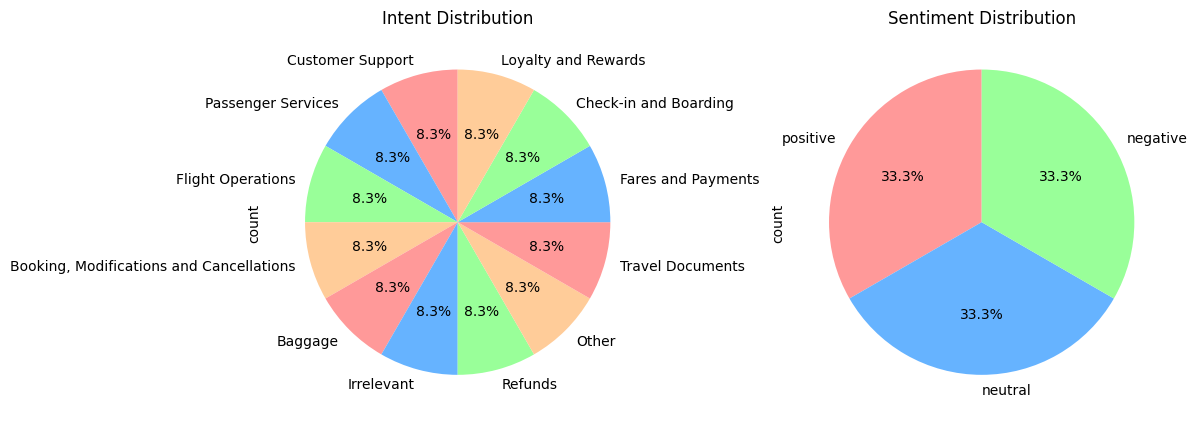

In [71]:
import matplotlib.pyplot as plt

# Count the distribution of intent and sentiment
intent_distribution = balanced_df['intent'].value_counts()
sentiment_distribution = balanced_df['sentiment'].value_counts()

# Plotting pie chart for intent distribution
plt.figure(figsize=(12, 6))

# Plot intent distribution
plt.subplot(1, 2, 1)
intent_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99', '#ffcc99'])
plt.title('Intent Distribution')

# Plot sentiment distribution
plt.subplot(1, 2, 2)
sentiment_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution')

plt.tight_layout()
plt.show()